In [1]:
pip install scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix
)

In [3]:
# Load the dataset
df = pd.read_csv("creditcard.csv")

In [4]:
# Initial data exploration
print("First few rows of the dataset:")
print(df.head())
print("\nDataset statistics:")
print(df.describe())

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [5]:
# Separating fraudulent and legitimate transactions
fraud_cases = df[df['Class'] == 1]
legit_cases = df[df['Class'] == 0]



In [6]:
# Calculate the fraction of fraud cases
fraud_ratio = len(fraud_cases) / float(len(legit_cases))
print(f"\nFraudulent transactions ratio: {fraud_ratio:.6f}")
print(f"Total Fraudulent Cases: {len(fraud_cases)}")
print(f"Total Legitimate Transactions: {len(legit_cases)}")


Fraudulent transactions ratio: 0.001730
Total Fraudulent Cases: 492
Total Legitimate Transactions: 284315


In [7]:
# Transaction amount summary
print("\nAmount statistics for fraudulent transactions:")
print(fraud_cases['Amount'].describe())

print("\nAmount statistics for legitimate transactions:")
print(legit_cases['Amount'].describe())



Amount statistics for fraudulent transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Amount statistics for legitimate transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


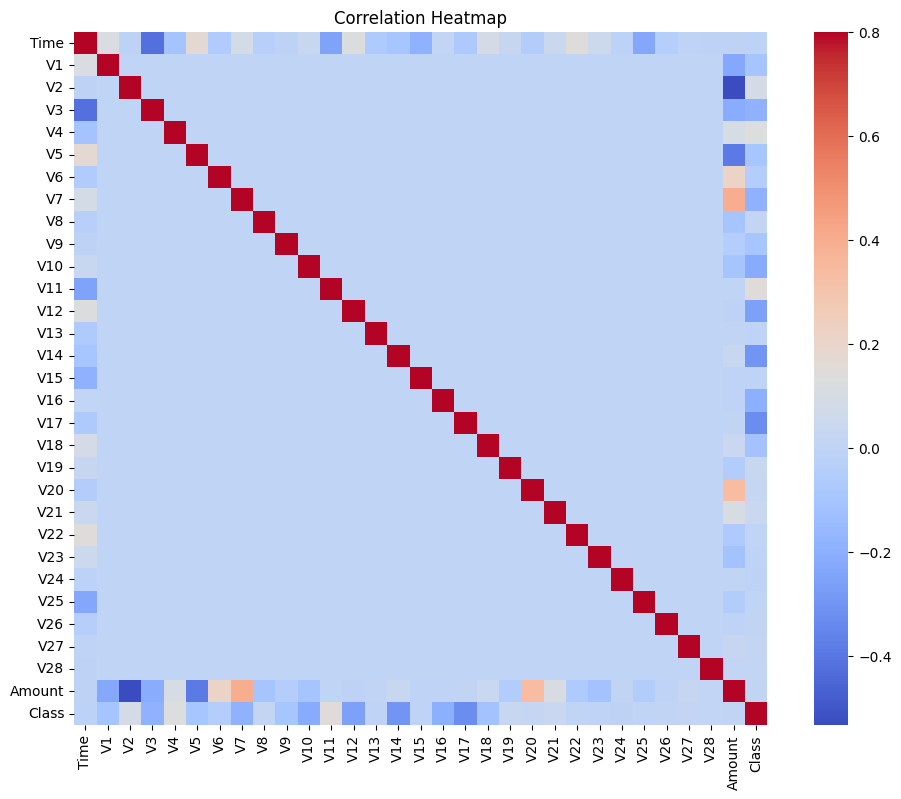

In [8]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=0.8, square=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [9]:
# Feature and label separation
features = df.drop(['Class'], axis=1)
labels = df['Class']

print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")



Features shape: (284807, 30)
Labels shape: (284807,)


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features.values, labels.values, test_size=0.2, random_state=42
)

In [11]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)


,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
# Make predictions
y_pred = model.predict(X_test)



In [15]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)


In [16]:
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")



Model Evaluation Metrics:
Accuracy: 0.9995
Precision: 0.9737
Recall: 0.7551
F1-Score: 0.8506
Matthews Correlation Coefficient: 0.8573


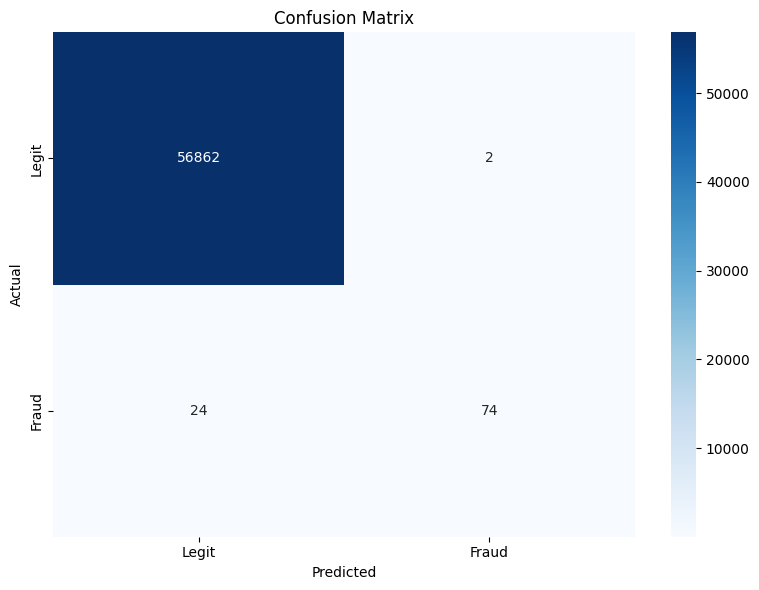

In [17]:
# Confusion Matrix Plot
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()